<a href="https://colab.research.google.com/github/pierredevillers/DMML2022_Coop/blob/main/Project_Coop_2022_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder) 
- code (folder) 
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want. 

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (optional but useful). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [71]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [72]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# install Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file, which you save on your Google Drive directy in my drive.

In [74]:
#Vanja
!mkdir train

mkdir: cannot create directory ‘train’: File exists


In [75]:
# Pierre
#!mkdir ~/.kaggle

In [76]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/kaggle.json


In [77]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-french-texts-difficulty-level-2022

  0% 0.00/303k [00:00<?, ?B/s]
100% 303k/303k [00:00<00:00, 55.5MB/s]


In [78]:
# from zipfile import ZipFile
# import zipfile

# pd.read_csv(zip_file.open("training_data.csv"))


In [79]:
! unzip detecting-french-texts-difficulty-level-2022.zip -d train

Archive:  detecting-french-texts-difficulty-level-2022.zip
  inflating: train/sample_submission.csv  
  inflating: train/training_data.csv  
  inflating: train/unlabelled_test_data.csv  


In [80]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [81]:
# read in your training data

import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/pierredevillers/DMML2022_Coop/main/training_data.csv')

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [84]:
df.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

In [85]:
df.isnull().sum()

id            0
sentence      0
difficulty    0
dtype: int64

Have a look at the data on which to make predictions.

In [86]:
# #Vanja
df_pred = pd.read_csv('/content/drive/MyDrive/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [87]:
#Pierre
# df_pred = pd.read_csv('unlabelled_test_data.csv')
# df_pred.head()

And this is the format for your submissions.

In [88]:
# #Pierre
# df_example_submission = pd.read_csv('sample_submission.csv')
# df_example_submission.head()

In [89]:
#Vanja
# df_example_submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
# df_example_submission.head()

### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem?
> Base Rate = (most frequent class) / (total observations)

In [90]:
df.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

In [91]:
base_rate = np.max(df.difficulty.value_counts()/df.difficulty.shape[0]) 
# Good if the base rate is arount 0.1666
print(f"Base rate:\n{base_rate:.4f}")

Base rate:
0.1694


#### Encode column difficulty 

In [92]:
# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

#Use Label Encoder for the level 
oe=OrdinalEncoder()
# set the order of your categories
oe.set_params(categories= [[ 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']])

# fit-transform a dataframe of the categorical age variable
oe_difficulty = oe.fit_transform(df[['difficulty']])

df['oe_difficulty'] = pd.DataFrame(oe_difficulty).astype('int')
df.oe_difficulty.value_counts()

0    813
5    807
4    798
2    795
1    795
3    792
Name: oe_difficulty, dtype: int64

In [93]:
oe_difficulty = pd.DataFrame(oe_difficulty, columns=['oe_difficulty']).astype('int')
oe_difficulty.value_counts()

oe_difficulty
0                813
5                807
4                798
1                795
2                795
3                792
dtype: int64

In [94]:
df.head()

,id,sentence,difficulty,oe_difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1,4
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,0
2,2,Le test de niveau en français est sur le site ...,A1,0
3,3,Est-ce que ton mari est aussi de Boston?,A1,0
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,2


#### Prepare the Data

In [95]:
%%capture
!pip install -U spacy

In [96]:
%%capture
!python -m spacy download fr_core_news_sm

In [97]:
%%capture
!python -m spacy download fr

# #Spacy tokanizer

In [110]:
import spacy
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load french language model
sp = spacy.load('fr_core_news_sm')

# Create tokenizer function
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)
    

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]

    # Remove stop words and punctuation
    # mytokens = [ word for word in mytokens if word not in punctuations ]

    # Return preprocessed list of tokens
    return mytokens

# Example
review = df["sentence"].sample()
review.values

array(["Les habitants du monde entier sont invités à une assemblée extraordinaire à Nossiop pour réfléchir aux applications de cette nouvelle technologie et à ses conséquences pour l'humanité."],
      dtype=object)

##### Give X and Y a value


In [100]:
#Give X and Y value
y = df.oe_difficulty
X = df.sentence
X.head()

0    Les coûts kilométriques réels peuvent diverger...
1    Le bleu, c'est ma couleur préférée mais je n'a...
2    Le test de niveau en français est sur le site ...
3             Est-ce que ton mari est aussi de Boston?
4    Dans les écoles de commerce, dans les couloirs...
Name: sentence, dtype: object

##### 4.1.2 Train/test splitting: split the data into 80% training and 20% test set. Remember to set the random seed to 50.

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train

70                                Comment t'appelles-tu ?
4347    Voilà qui serait en effet de nature à simplifi...
1122    Les pèlerins partagèrent alors cette célébrati...
4570                          Qu'est-ce que vous faites ?
34      En voici un des moins obscurs : "Plus nous dev...
                              ...                        
1033    Les micro-changements apportés par ce type d'u...
3264    J'allais à la poste quand j'ai croisé ma cousi...
1653    Au cours des années 1970 et 1980, plusieurs gr...
2607    Stop : tout d'abord, figurez-vous que les vrai...
2732    "On s'est alors dit que le terrain commençait ...
Name: sentence, Length: 3840, dtype: object

In [102]:
y_train

70      0
4347    3
1122    4
4570    0
34      5
       ..
1033    3
3264    1
1653    4
2607    3
2732    2
Name: oe_difficulty, Length: 3840, dtype: int64

#### 4.2. Logistic Regression 

Train a simple logistic regression model using a Tfidf vectoriser.

In [103]:
#Random state 0

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer (tokenizer=spacy_tokenizer)

X_text = tfidf.fit_transform(X_train)

logreg = LogisticRegression(solver = 'lbfgs', random_state=0, multi_class='multinomial')

pipe_logreg = Pipeline([('vectorizer', tfidf),
                 ('classifier', logreg)])

pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f5066ebe8b0>)),
                ('classifier',
                 LogisticRegression(multi_class='multinomial',
                                    random_state=0))])

In [105]:
y_pred_logreg = pipe_logreg.predict(X_test)

Calculate accuracy, precision, recall and F1 score on the test set.



##### Accuracy scores on Test set

In [106]:
test_acc_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"TEST ACCURACY SCORE:\n{test_acc_logreg:.6f}")

TEST ACCURACY SCORE:
0.477083


In [107]:
def evaluate(test, pred):
  precision = precision_score(test, pred, average='macro')
  recall = recall_score(test, pred, average='macro')
  f1= f1_score(test, pred, average='macro')
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.6f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.6f}\n\tRecall: {recall:.6f}\n\tF1_Score: {f1:.6f}')

def accuracy_conf_mat(y_test, y_pred):
  print(round(accuracy_score(y_test, y_pred), 4))
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

In [108]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, Perceptron
ridge_spacy_model = RidgeClassifier()
ridge_spacy_pipe = Pipeline([('vectorizer', tfidf),
                             ('classifier', ridge_spacy_model)])

ridge_spacy_pipe.fit(X_train, y_train)

ridge_spacy_pred = ridge_spacy_pipe.predict(X_test)

ridge_spacy_report = evaluate(y_test, ridge_spacy_pred)

# Store model performance results


ridge_spacy_report

CONFUSION MATRIX:
[[101  37  18   2   3   0]
 [ 55  62  28   8   5   6]
 [ 20  40  66  12   7  15]
 [  9  14  24  58  17  22]
 [ 11   8  14  31  70  39]
 [  7  10   9  17  26  89]]
ACCURACY SCORE:
0.464583
CLASSIFICATION REPORT:
	Precision: 0.465945
	Recall: 0.464762
	F1_Score: 0.461918


###Test Hyperparameter

CONFUSION MATRIX:
[[102  25  22   6   5   1]
 [ 45  67  31  12   4   5]
 [ 13  28  77  23   8  11]
 [  8   7  21  62  25  21]
 [  8   4  12  41  68  40]
 [  9   9  10  19  29  82]]
ACCURACY SCORE:
0.477083
CLASSIFICATION REPORT:
	Precision: 0.476181
	Recall: 0.477656
	F1_Score: 0.474729
0.4771


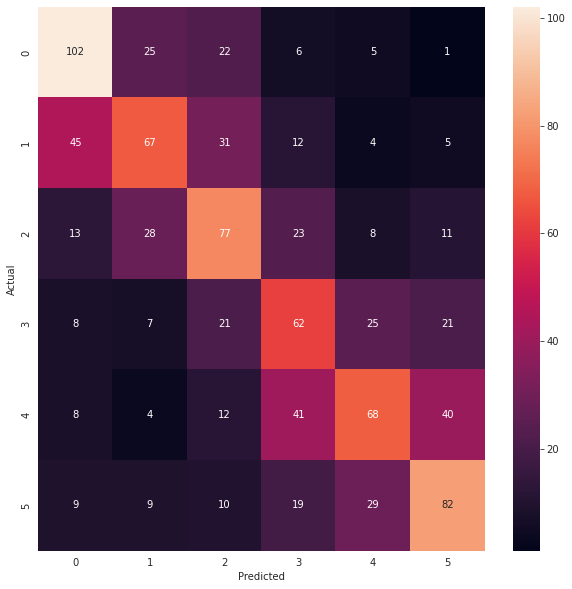

In [109]:
evaluate(y_test, y_pred_logreg)
accuracy_conf_mat(y_test, y_pred_logreg)

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [ ]:
# Tokenize data - same tokenizer function as before
# %%time
# from gensim.models.doc2vec import TaggedDocument
# sample_tagged = df.apply(lambda r: TaggedDocument(words=spacy_tokenizer(r['sentence']), tags=[r.oe_difficulty]), axis=1)
# print(sample_tagged.head(20))

In [ ]:
# # Train test split - same split as before
# train_tagged, test_tagged = train_test_split(sample_tagged, test_size=0.2, random_state=0)

# train_tagged

# # Allows to speed up a bit
# import multiprocessing
# cores = multiprocessing.cpu_count()

# # Define Doc2Vec and build vocabulary
# from gensim.models import Doc2Vec

# model_dbow = Doc2Vec(dm=0, vector_size=30, negative=6, hs=0, min_count=1, sample=0, workers=cores, epoch=300)
# model_dbow.build_vocab([x for x in train_tagged.values])

# # Train distributed Bag of Word model
# model_dbow.train(train_tagged, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)

# # Select X and y
# def vec_for_learning(model, tagged_docs):
#     sents = tagged_docs.values
#     targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=100)) for doc in sents])
#     return targets, regressors

# y_train, X_train = vec_for_learning(model_dbow, train_tagged)
# y_test, X_test = vec_for_learning(model_dbow, test_tagged)

# # Fit model on training set - same algorithm as before
# logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
# logreg.fit(X_train, y_train)

# # Predictions
# y_pred = logreg.predict(X_test)

# # Evaluate model
# print(round(accuracy_score(y_test, y_pred), 4))
# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(15,15))
# sns.heatmap(conf_mat, annot=True, fmt='d')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()


#Next step

In [ ]:
# print(round(accuracy_score(y_test, y_pred_logreg), 4))
# conf_mat = confusion_matrix(y_test, y_pred_logreg)
# fig, ax = plt.subplots(figsize=(15,15))
# sns.heatmap(conf_mat, annot=True, fmt='d')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [ ]:
df_pred

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."
...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...
1196,1196,Je vais parler au serveur et voir si on peut d...
1197,1197,Il n'était pas comme tant de gens qui par pare...
1198,1198,Ils deviennent dangereux pour notre économie.


In [ ]:
x_new = df_pred.sentence
y_new_pred = pipe_logreg.predict(x_new)
df_pred['difficulty'] = y_new_pred.tolist()
df_pred['difficulty'] = df_pred['difficulty'].replace({0:'A1', 1:'A2', 2: 'B1', 3:'B2', 4:'C1', 5:'C2'})

df_pred

,id,sentence,difficulty
0,0,Nous dûmes nous excuser des propos que nous eû...,A2
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...,A2
2,2,"Et, paradoxalement, boire froid n'est pas la b...",A2
3,3,"Ce n'est pas étonnant, car c'est une saison my...",B1
4,4,"Le corps de Golo lui-même, d'une essence aussi...",C2
...,...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...,C2
1196,1196,Je vais parler au serveur et voir si on peut d...,A2
1197,1197,Il n'était pas comme tant de gens qui par pare...,C2
1198,1198,Ils deviennent dangereux pour notre économie.,B2


In [ ]:
df_pred = df_pred.drop(columns=['sentence'])

In [ ]:
df_pred

,id,difficulty
0,0,A2
1,1,A2
2,2,A2
3,3,B1
4,4,C2
...,...,...
1195,1195,C2
1196,1196,A2
1197,1197,C2
1198,1198,B2


In [ ]:
df_pred.to_csv('Group_Coop.csv', index=False)
df_pred.to_csv('/content/drive/MyDrive/Colab Notebooks/Group_Coop.csv', index=False)

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer()

X_text = tfidf.fit_transform(X_train)

knn = KNeighborsClassifier()

pipe_knn = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn)])

pipe_knn.fit(X_train, y_train)

y_pred_knn = pipe_knn.predict(X_test)



In [ ]:
evaluate(y_test, y_pred_knn)
accuracy_conf_mat(y_test, y_pred_knn)

In [ ]:
grid = {'n_neighbors':np.arange(1,20),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn_cv = GridSearchCV(knn, grid, cv=5)
knn_cv.fit(X_text, y_train)
print("Hyperparameters:", knn_cv.best_params_)

Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [ ]:
knn_opt = KNeighborsClassifier(n_neighbors=11, p=2, weights='distance')

pipe_knn_opt = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn_opt)])

pipe_knn_opt.fit(X_train, y_train)

y_pred_knn_opt = pipe_knn_opt.predict(X_test)


In [ ]:
evaluate(y_test, y_pred_knn_opt)
accuracy_conf_mat(y_test, y_pred_knn_opt)

#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tfidf = TfidfVectorizer()

X_text = tfidf.fit_transform(X_train)

tree = DecisionTreeClassifier()

pipe_tree = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree)])

pipe_tree.fit(X_train, y_train)

y_pred_tree = pipe_tree.predict(X_test)

evaluate(y_test, y_pred_tree)
accuracy_conf_mat(y_test, y_pred_tree)

In [ ]:
plt.figure(figsize=(24, 24))
plot_tree(tree, filled=True);

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
grid = {'max_depth':np.arange(1,20)}

tree_cv = GridSearchCV(tree, grid, cv=5)
tree_cv.fit(X_text, y_train)

# Print results
print("Hyperparameters:", tree_cv.best_params_)

In [ ]:
tree_opt = DecisionTreeClassifier(max_depth=11)

pipe_tree_opt = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree_opt)])

pipe_tree_opt.fit(X_train, y_train)

y_pred_tree_opt = pipe_tree_opt.predict(X_test)

In [ ]:
evaluate(y_test, y_pred_tree_opt)
accuracy_conf_mat(y_test, y_pred_tree_opt)

#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer()

X_text = tfidf.fit_transform(X_train)

rfc = RandomForestClassifier()

pipe_rfc = Pipeline([('vectorizer', tfidf),
                 ('classifier', rfc)])

pipe_rfc.fit(X_train, y_train)

y_pred_rfc = pipe_rfc.predict(X_test)

evaluate(y_test, y_pred_rfc)
accuracy_conf_mat(y_test, y_pred_rfc)

In [ ]:
grid = {'max_depth':np.arange(1,50)}

rfc_cv = GridSearchCV(rfc, grid, cv=5)
rfc_cv.fit(X_text, y_train)

# Print results
print("Hyperparameters:", rfc_cv.best_params_)

In [ ]:
rfc_opt = RandomForestClassifier(max_depth=39)

pipe_rfc_opt = Pipeline([('vectorizer', tfidf),
                 ('classifier', rfc_opt)])

pipe_rfc_opt.fit(X_train, y_train)

y_pred_rfc_opt = pipe_rfc_opt.predict(X_test)

evaluate(y_test, y_pred_rfc_opt)
accuracy_conf_mat(y_test, y_pred_rfc_opt)

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [ ]:
# we update and install spaCy
!pip install -U spacy


In [ ]:
# we load the english language model
!python -m spacy download fr_core_news_sm

In [ ]:
import spacy
from spacy import displacy

sp = spacy.load('fr_core_news_sm')


In [ ]:
sentence = sp("Bonjour, je travaille sur un projet de programmation en python")

In [ ]:
for word in sentence:
    print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

#### 4.7. Show a summary of your results